In [55]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# generating random numbers
from random import randint
import random
#from random import uniform

# data visualization
import seaborn as sns
import seaborn as seabornInstance 
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

*******data fields*******

    * age
    * sex
    * chest pain type (4 values)
    * resting blood pressure
    * serum cholestoral in mg/dl
    * fasting blood sugar > 120 mg/dl
    * resting electrocardiographic results (values 0,1,2)
    * maximum heart rate achieved
    * exercise induced angina
    * oldpeak = ST depression induced by exercise relative to rest
    * the slope of the peak exercise ST segment
    * number of major vessels (0-3) colored by flourosopy
    * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect




*******Full Dataset Metadata*******
* age: age in years 
* sex: sex (1 = male; 0 = female) 
* cp: chest pain type 
 -- Value 1: typical angina 
 -- Value 2: atypical angina 
 -- Value 3: non-anginal pain 
 -- Value 4: asymptomatic 
* trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
* chol: serum cholestoral in mg/dl 
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg: resting electrocardiographic results 
 -- Value 0: normal 
 -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
 -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
* thalach: maximum heart rate achieved 
* exang: exercise induced angina (1 = yes; 0 = no)     
* oldpeak = ST depression induced by exercise relative to rest 
* slope: the slope of the peak exercise ST segment 
 -- Value 1: upsloping 
* -- Value 2: flat 
* -- Value 3: downsloping 
* ca: number of major vessels (0-3) colored by flourosopy     
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
* num: diagnosis of heart disease (angiographic disease status) 
  -- Value 0: < 50% diameter narrowing 
  -- Value 1: > 50% diameter narrowing     





In [56]:
df = pd.read_csv('heart.csv')
df2 = pd.read_csv('heart.csv')
df2['id'] = 1

In [57]:
# convert 'chol', 'trestbps', 'age' and 'thalach' fields into encoded fields for DS Algorithm
def clean_data(x):
        x.loc[ x['chol'] < 200, 'chol']   = 0
        x.loc[(x['chol'] >= 200) & (x['chol'] <= 239), 'chol'] = 1
        x.loc[(x['chol'] >= 240) & (x['chol'] <= 280), 'chol'] = 2
        x.loc[(x['chol'] >= 281) & (x['chol'] <= 321), 'chol'] = 3
        x.loc[(x['chol'] >= 322) & (x['chol'] <= 362), 'chol'] = 4
        x.loc[(x['chol'] >= 363) & (x['chol'] <= 399), 'chol'] = 5
        x.loc[(x['chol'] >= 400), 'chol'] = 6

        x.loc[ x['trestbps'] <= 120, 'trestbps']   = 0
        x.loc[(x['trestbps'] >= 121) & (x['trestbps'] <= 129), 'trestbps'] = 1
        x.loc[(x['trestbps'] >= 130) & (x['trestbps'] <= 139), 'trestbps'] = 2
        x.loc[(x['trestbps'] >= 140) & (x['trestbps'] <= 149), 'trestbps'] = 3
        x.loc[(x['trestbps'] >= 150) & (x['trestbps'] <= 159), 'trestbps'] = 4
        x.loc[(x['trestbps'] >= 160) & (x['trestbps'] <= 169), 'trestbps'] = 5
        x.loc[(x['trestbps'] >= 170) & (x['trestbps'] <= 179), 'trestbps'] = 6 
        x.loc[(x['trestbps'] >= 180), 'trestbps'] = 7

        x.loc[ x['thalach'] <= 100, 'thalach']   = 0
        x.loc[(x['thalach'] >= 101) & (x['thalach'] <= 125), 'thalach'] = 1
        x.loc[(x['thalach'] >= 126) & (x['thalach'] <= 151), 'thalach'] = 2
        x.loc[(x['thalach'] >= 152) & (x['thalach'] <= 173), 'thalach'] = 3 
        x.loc[(x['thalach'] >= 174), 'thalach'] = 4

        x.loc[(x['age'] >= 20) & (x['age'] <= 29), 'age'] = 0
        x.loc[(x['age'] >= 30) & (x['age'] <= 39), 'age'] = 1
        x.loc[(x['age'] >= 40) & (x['age'] <= 49), 'age'] = 2
        x.loc[(x['age'] >= 50) & (x['age'] <= 59), 'age'] = 3  
        x.loc[(x['age'] >= 60) & (x['age'] <= 69), 'age'] = 4  
        x.loc[(x['age'] >= 70), 'age'] = 5  



In [58]:
len(df)

303

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
heart_df = df[['sex','age','trestbps','cp','restecg','target']]
heart_df['id'] = 1

/Users/christopherbuck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
heart_df[['sex','age','target']].describe()

,sex,age,target
count,303.000000,303.000000,303.000000
mean,0.683168,54.366337,0.544554
std,0.466011,9.082101,0.498835
min,0.000000,29.000000,0.000000
25%,0.000000,47.500000,0.000000
50%,1.000000,55.000000,1.000000
75%,1.000000,61.000000,1.000000
max,1.000000,77.000000,1.000000


***Notes: Distibution Analysis by Gender***

     • The dataset contains 68% men (via [sex] mean)
     • There was one male patient in their 20s, that also had heart disease  
     • Overall, 54% of the membrs are found to have heart disease (via [target] mean)


In [62]:
heart_df[heart_df['sex'] == 1][['sex','age','target']].describe()

,sex,age,target
count,207.0,207.000000,207.000000
mean,1.0,53.758454,0.449275
std,0.0,8.883803,0.498626
min,1.0,29.000000,0.000000
25%,1.0,47.000000,0.000000
50%,1.0,54.000000,0.000000
75%,1.0,59.500000,1.000000
max,1.0,77.000000,1.000000


***Notes: Distibution Analysis of Male Records***

     • Within men, 45% have heart disease.  The average aged man in the dataset is 54



In [63]:
heart_df[heart_df['sex'] == 0][['sex','age','target']].describe()

,sex,age,target
count,96.0,96.000000,96.000000
mean,0.0,55.677083,0.750000
std,0.0,9.409396,0.435286
min,0.0,34.000000,0.000000
25%,0.0,49.750000,0.750000
50%,0.0,57.000000,1.000000
75%,0.0,63.000000,1.000000
max,0.0,76.000000,1.000000


***Notes: Distibution Analysis of Women Records***

     • Within women, 75% have heart disease.  The average aged woman in the dataset is 55



In [64]:
#heart_df['age_bin'] = pd.cut(x=heart_df['age'], bins=[20, 29, 39, 49, 59,69,79], labels=['20s', '30s', '40s', '50s', '60s', '70s'])

heart_df['age_bin'] = '1'
heart_df.loc[(heart_df['age'] >= 20) & (heart_df['age'] <= 29), 'age_bin'] = '20s'
heart_df.loc[(heart_df['age'] >= 30) & (heart_df['age'] <= 39), 'age_bin'] = '30s' 
heart_df.loc[(heart_df['age'] >= 40) & (heart_df['age'] <= 49), 'age_bin'] = '40s' 
heart_df.loc[(heart_df['age'] >= 50) & (heart_df['age'] <= 59), 'age_bin'] = '50s' 
heart_df.loc[(heart_df['age'] >= 60) & (heart_df['age'] <= 69), 'age_bin'] = '60s' 
heart_df.loc[(heart_df['age'] >= 70) & (heart_df['age'] <= 79), 'age_bin'] = '70s' 
heart_df.loc[(heart_df['age'] >= 80) & (heart_df['age'] <= 89), 'age_bin'] = '80s' 
heart_df.loc[(heart_df['age'] >= 90) & (heart_df['age'] <= 99), 'age_bin'] = '90s'


heart_df.loc[(heart_df['sex'] == 0), 'sex'] = 'W'
heart_df.loc[(heart_df['sex'] == 1), 'sex'] = 'M'

heart_df.loc[(heart_df['target'] == 0), 'target'] = 'No Heart Disease'
heart_df.loc[(heart_df['target'] == 1), 'target'] = 'Heart Disease'


/Users/christopherbuck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/christopherbuck/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [65]:
table = pd.pivot_table(heart_df, values='id', index=['age_bin','sex'],columns=['target'], aggfunc=np.sum, fill_value=0)
#table['% of Total'] = ((table[1] / (table['No Heart Disease'] + table[1]) * 100).astype(str)) + '%'
table['Total People'] = (table['No Heart Disease'] + table['Heart Disease']).fillna(0)
table['% of Total'] = round(((table['Heart Disease'] / (table['No Heart Disease'] + table['Heart Disease']) * 100).fillna(0)),2).astype(str) + '%'

#table['% of Total'].round(decimals=3)
table

target       Heart Disease  No Heart Disease  Total People % of Total
age_bin sex                                                          
20s     M                1                 0             1     100.0%
30s     M                6                 4            10      60.0%
        W                5                 0             5     100.0%
40s     M               32                21            53     60.38%
        W               18                 1            19     94.74%
50s     M               41                50            91     45.05%
        W               24                10            34     70.59%
60s     M               12                35            47     25.53%
        W               20                13            33     60.61%
70s     M                1                 4             5      20.0%
        W                5                 0             5     100.0%

***Notes:  Heart Disease by Age Bracket***

*Overview:  50yo men and 40yo women led all age-gender groups in total vol [41 people] and % [95%] (respectively) of members with heart disease

   
   
    *Age Buckets with the Highest % of total Age distribution
     • 40yo women | 95% have heart disease
     • 50yo women | 71% have heart disease

    *Age Buckets with the Lowest % of total Age distribution
     • 60yo men | 25% have heart disease
     • 50yo men | 45% have heart disease


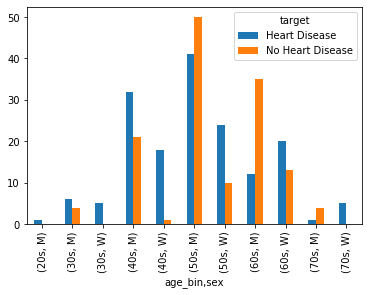

In [66]:
table2 = pd.pivot_table(heart_df, values='id', index=['age_bin','sex'],columns=['target'], aggfunc=np.sum, fill_value=0)
#table2['Total People'] = (table[0] + table[1]).fillna(0)
table2['% of Total'] = round(((table['Heart Disease'] / (table['No Heart Disease'] + table['Heart Disease'])).fillna(0)),4).astype(str)
table2
table2.plot(kind='bar')
pct_of_ttl_age = table2[['% of Total']]

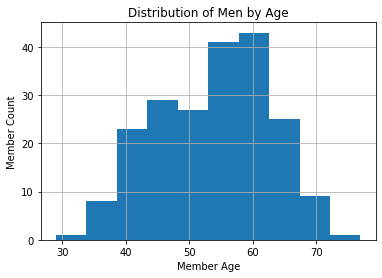

In [67]:
#heart_df[heart_df['sex']== 1]['age'].hist();
ax = heart_df[heart_df['sex']== 'M']['age'].plot(kind='hist', title='Distribution of Men by Age',grid=True )
plt.ylabel('Member Count', size=10);
plt.xlabel('Member Age', size=10);

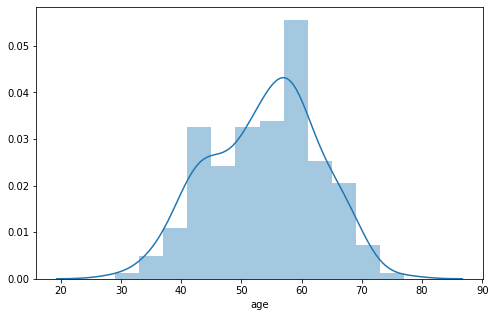

In [68]:
plt.figure(figsize=(8,5))
plt.tight_layout()
seabornInstance.distplot(heart_df[heart_df['sex']== 'M']['age']);

***Figure:  Distribution of Male Members by Age***

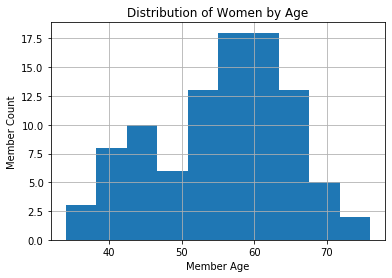

In [69]:
#heart_df[heart_df['sex']== 0]['age'].hist(); 
ax = heart_df[heart_df['sex']== 'W']['age'].plot(kind='hist', title='Distribution of Women by Age',grid=True )
plt.ylabel('Member Count', size=10);
plt.xlabel('Member Age', size=10);

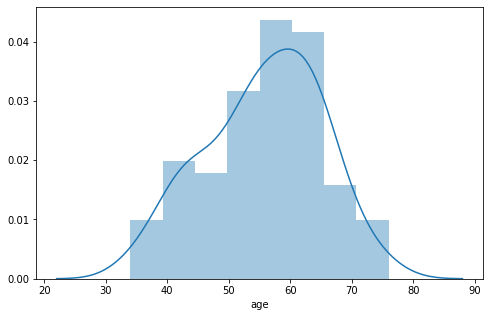

In [70]:
plt.figure(figsize=(8,5))
plt.tight_layout()
seabornInstance.distplot(heart_df[heart_df['sex']== 'W']['age']);

***Figure:  Distribution of Women Members by Age***

***ScikitLearn Models***

In [71]:
clean_data(df)

In [72]:
training, testing = train_test_split(df, test_size=0.2, random_state = 42)

In [73]:
X_train = training.drop("target", axis=1)
Y_train = training["target"]
#X_test  = test_df.drop("target", axis=1).copy()
X_test  = testing.drop("target", axis=1)
Y_test = testing["target"]

In [74]:
#K Nearest Neighbor 

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

In [75]:
print(f'The KNN accuracy on the training set was {acc_knn}%')
print(f'The KNN accuracy on the training set was {test_acc_knn}%')

The KNN accuracy on the training set was 88.02%
The KNN accuracy on the training set was 83.61%


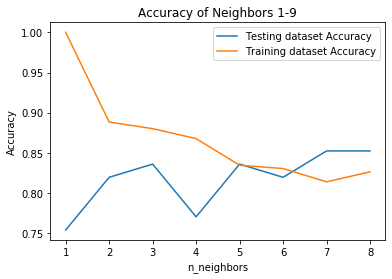

In [76]:
X = np.asarray(df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach', 'exang','oldpeak',  
                           'slope', 'ca', 'thal']]) 
Y = np.asarray(df['target']) 

X_train, X_test, Y_train, Y_test = train_test_split(  
        X, Y, test_size = 0.2, random_state = 42)

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values and train the model to determine the most accurate value for K
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, Y_train) 
    test_accuracy[i] = knn.score(X_test, Y_test) 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')   
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title("Accuracy of Neighbors 1-9") 
plt.show() 

***Notes:  KNN Algorithm [a/g source data]***

*Training set was established at 80%.  KNN tested at 3 neighbors.

*The KNN algorithm saw the test set outperform at 5 neighbors.

In [77]:
#K Nearest Neighbor with 5 neighbors

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

In [78]:
print(f'The KNN accuracy on the training set was {acc_knn}%')
print(f'The KNN accuracy on the training set was {test_acc_knn}%')

The KNN accuracy on the training set was 83.47%
The KNN accuracy on the training set was 83.61%


**KNN Test on Dummy Data**

In [144]:
dummy_data1 = pd.read_csv('heart_dummy_data4.csv')

In [145]:
training, testing = train_test_split(dummy_data1, test_size=0.2, random_state = 42)

In [146]:
X_train = training.drop("target", axis=1)
Y_train = training["target"]
X_test  = testing.drop("target", axis=1)
Y_test = testing["target"]

In [147]:
# Determine the length of the X_Train and X_Test datasets

print(f'The training set has {len(X_train)} rows and the test set has {len(X_test)} rows')

The training set has 253 rows and the test set has 64 rows


In [148]:
#K Nearest Neighbor #3 [manual split on dummy dataset #1]
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

In [149]:
print(f'The KNN accuracy on the training set was {acc_knn}%')
print(f'The KNN accuracy on the training set was {test_acc_knn}%')

The KNN accuracy on the training set was 75.1%
The KNN accuracy on the training set was 53.12%


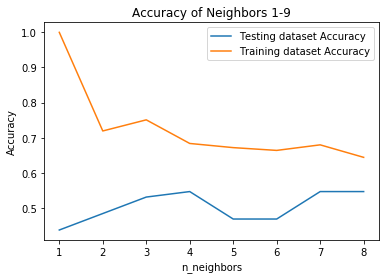

In [152]:
X = np.asarray(dummy_data1[['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach', 'exang','oldpeak',  
                           'slope', 'ca', 'thal']]) 
Y = np.asarray(dummy_data1['target']) 

X_train, X_test, Y_train, Y_test = train_test_split(  
        X, Y, test_size = 0.2, random_state = 42)

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values and train the model to determine the most accurate value for K
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, Y_train) 
    test_accuracy[i] = knn.score(X_test, Y_test) 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')   
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title("Accuracy of Neighbors 1-9") 
plt.show() 

***Notes:  KNN Algorithm [a/g dummy data]***

*Dummy Training set was established at 80%.  KNN tested at 3 neighbors.

*The dummy test set KNN algorithm saw the test was less accurate than a/g the source data set.  This data set had roughly the same record size(317 records compared to 303 in the source file), but didnt have a strong correlation between its variables.  I need to work on creating a better quality dummy test set.


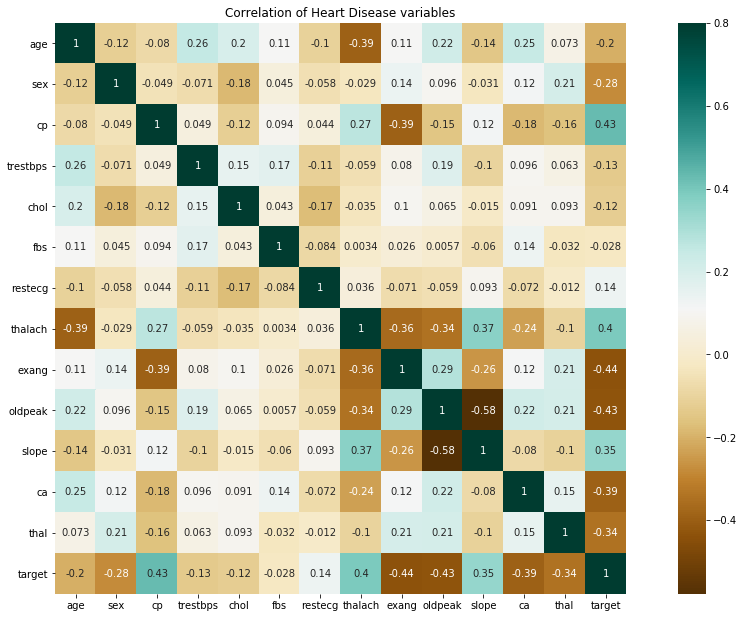

In [162]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
data_corr = df.corr()
sns.heatmap(data_corr , vmax=.8, annot=True, square=True, cmap="BrBG") 
plt.title("Correlation of Heart Disease variables")
plt.show()

***Notes:  Heart Disease by Age Bracket***

*Overview:  Chest pain "cp", Maximum heart rate "thalach" and slope were the biggest factors. Lets remove variables that dont have a significant impact


*Overview:  Removing "ca", "thal", "oldpeak", "exang" from the model



In [154]:
import statsmodels.api as sm
a = df.drop("target", axis=1)
b = df["target"]
logit_model=sm.Logit(b,a)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.361520
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.475     
Dependent Variable: target           AIC:              245.0809  
Date:               2020-07-23 16:06 BIC:              293.3595  
No. Observations:   303              Log-Likelihood:   -109.54   
Df Model:           12               LL-Null:          -208.82   
Df Residuals:       290              LLR p-value:      6.4740e-36
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.2361    0.1765   1.3372  0.1812  -0.1099   0.5821
sex           -1.5368    0.4369  -3.5171  0.0004  -2.3932  -0.

***Notes:  Logistic Regression Statistical Summary***

*Overview:  Chest pain "cp", Maximum heart rate "thalach" and slope were the leading factors




In [119]:
training, testing = train_test_split(df, test_size=0.1, random_state = 42)

In [120]:
X_train = training.drop(["target", "ca", "thal", "oldpeak", "exang"], axis=1)
Y_train = training["target"]
#X_test  = test_df.drop("target", axis=1).copy()
X_test  = testing.drop(["target", "ca", "thal", "oldpeak", "exang"], axis=1)
Y_test = testing["target"]

In [121]:
#K Nearest Neighbor 

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

In [122]:
print(f'The KNN accuracy on the training set was {acc_knn}%')
print(f'The KNN accuracy on the training set was {test_acc_knn}%')

The KNN accuracy on the training set was 85.29%
The KNN accuracy on the training set was 77.42%


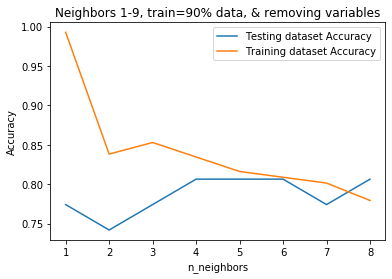

In [126]:
X = np.asarray(df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','slope']]) 
Y = np.asarray(df['target']) 

X_train, X_test, Y_train, Y_test = train_test_split(  
        X, Y, test_size = 0.1, random_state = 42)

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values and train the model to determine the most accurate value for K
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, Y_train) 
    test_accuracy[i] = knn.score(X_test, Y_test) 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')   
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title("Neighbors 1-9, train=90% data, & removing variables") 
plt.show() 

***Notes:  KNN Algorithm [a/g source data] after feature removal and incr training data***

*Training set was increased to 90%

*Removing the 4 least impactful variables 

*The intial KNN algorithm saw the test set outperform at 5 neighbors.  After tweaking the model, the test set outperforms the training set at 7.5 neigbors




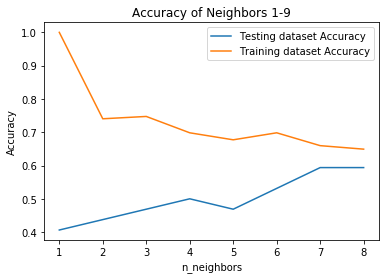

In [128]:
X = np.asarray(dummy_data1[['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','slope']])
Y = np.asarray(dummy_data1['target']) 

X_train, X_test, Y_train, Y_test = train_test_split(  
        X, Y, test_size = 0.1, random_state = 42)

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values and train the model to determine the most accurate value for K
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, Y_train) 
    test_accuracy[i] = knn.score(X_test, Y_test) 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')   
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title("Accuracy of Neighbors 1-9") 
plt.show() 

***Notes:  KNN Algorithm [a/g Dummy Data] after feature removal and incr training data***

*Training set was increased to 90%

*Removing the 4 least impactful variables 

*The dummy test set KNN algorithm saw the better performance than the initial dummy data KNN run.  Removing the same 4 varibles that werent factors in the source data set let to better performance at 6/+ neighbors.


